In [6]:
import numpy as np
import matplotlib.pyplot as plt
import fitsio
import glob
import pandas as pd

118770 0.9799117826516968
118771 0.97941717450119
118772 0.9628189098789076
118773 0.9723358904097392
118774 0.9592878095052596
118775 0.9740944580179572
118776 0.9698063552813678
118777 0.9728956753287452
118778 0.959893833133786
118779 0.9584364712682378
118792 0.9741153831976936


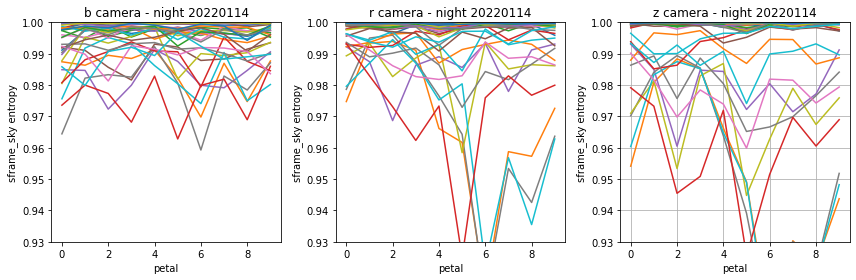

In [23]:
date = '20220114'
files = "qa_entropy_data/{}/entropy_sky*.csv".format(date)
files = glob.glob(files)
#print(files)
data = {}
for i,f in enumerate(files):
    data[i] = pd.read_csv(f)

bad_exp = []
bad_entropy = []
   
plt.figure(figsize=(12,4))
for i, cam in enumerate(['b', 'r', 'z']):
    plt.subplot(1,3,i+1)
    plt.xlabel('petal')
    plt.ylabel('sframe_sky entropy')
    for j in data.keys():
        b = np.array(list(data[j]['band'])) 
        ii = (b==cam)
        #print(data[j]['band'][0], ii)
        if ii is not False:
            plt.plot(data[j]['petal'][ii], data[j]['entropy'][ii])#, label='{}'.format(list(set(data[j]['expid'][ii]))[0]))
            plt.title('{} camera - night {}'.format(cam, date))
            plt.ylim([0.93,1])
            ll = np.count_nonzero(data[j]['entropy'][ii]<0.980)
            if ll > 0:
                bexp = data[j]['expid'][0]
                if bexp not in bad_exp:
                    bad_exp.append(bexp)
                    bad_entropy.append(np.min(data[j]['entropy'][ii]))
        #plt.legend()
plt.grid()
plt.tight_layout()

bad_exp = np.array(bad_exp)
bad_entropy = np.array(bad_entropy)
ii = np.argsort(bad_exp)

bad_exp = bad_exp[ii]
bad_entropy = bad_entropy[ii]
for b,e in zip(bad_exp, bad_entropy):
    print(b,e)

In [10]:
a = np.array(list(data[i]['band']))
a=='b'

array([ True, False, False,  True, False, False,  True, False, False,
        True, False, False,  True, False, False,  True, False, False,
        True, False, False,  True, False, False,  True, False, False,
        True, False, False])

In [2]:
sframe_file = "/global/cfs/cdirs/desi/spectro/redux/dataqa-tutorial/exposures/20211014/00104282/sframe-b0-00104282.fits"

h = fitsio.FITS(sframe_file)
#h = fits.open(sframe_file)
sel = h["FIBERMAP"]["OBJTYPE"].read() == "SKY"
sky = h["FLUX"].read()[sel,:]


In [3]:
np.shape(sky)

(40, 2751)

In [4]:
set(h["FIBERMAP"]["OBJTYPE"].read())

{'', 'SKY', 'TGT'}

In [4]:
set(h["FIBERMAP"]["OBJTYPE"].read())

{'', 'SKY', 'TGT'}

In [5]:
fiberflat_file = "/global/cfs/cdirs/desi/spectro/redux/daily/calibnight/20211025/fiberflatnight-z0-20211025.fits"
h = fitsio.FITS(fiberflat_file)
fflat = h["FIBERFLAT"].read() 


#h = fits.open(sframe_file)

In [6]:
np.shape(fflat)

(500, 2881)

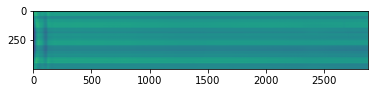

In [15]:
plt.imshow(fflat)

In [28]:
fiberflats = glob.glob("/global/cfs/cdirs/desi/spectro/redux/daily/calibnight/2021*/fiberflatnight-z0-*.fits")

In [29]:
fiberflats.sort()

In [30]:
fiberflats

['/global/cfs/cdirs/desi/spectro/redux/daily/calibnight/20210105/fiberflatnight-z0-20210105.fits',
 '/global/cfs/cdirs/desi/spectro/redux/daily/calibnight/20210106/fiberflatnight-z0-20210106.fits',
 '/global/cfs/cdirs/desi/spectro/redux/daily/calibnight/20210108/fiberflatnight-z0-20210108.fits',
 '/global/cfs/cdirs/desi/spectro/redux/daily/calibnight/20210109/fiberflatnight-z0-20210109.fits',
 '/global/cfs/cdirs/desi/spectro/redux/daily/calibnight/20210110/fiberflatnight-z0-20210110.fits',
 '/global/cfs/cdirs/desi/spectro/redux/daily/calibnight/20210111/fiberflatnight-z0-20210111.fits',
 '/global/cfs/cdirs/desi/spectro/redux/daily/calibnight/20210112/fiberflatnight-z0-20210112.fits',
 '/global/cfs/cdirs/desi/spectro/redux/daily/calibnight/20210115/fiberflatnight-z0-20210115.fits',
 '/global/cfs/cdirs/desi/spectro/redux/daily/calibnight/20210116/fiberflatnight-z0-20210116.fits',
 '/global/cfs/cdirs/desi/spectro/redux/daily/calibnight/20210131/fiberflatnight-z0-20210131.fits',
 '/global/

In [33]:
len(fiberflats)*10*3*20/3600.0

29.166666666666668

In [95]:
import pandas as pd

25 [20211001, 20211002, 20211003, 20211004, 20211005, 20211006, 20211007, 20211008, 20211010, 20211011, 20211012, 20211013, 20211014, 20211015, 20211016, 20211017, 20211018, 20211019, 20211020, 20211021, 20211022, 20211023, 20211024, 20211025, 20211026]


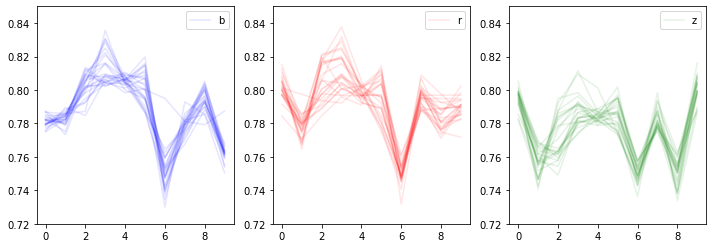

In [40]:
colors = {'b':'blue', 'r':'red', 'z':'green'}
data = pd.read_csv('calibnight_entropy.csv')
dates = list(set(data['NIGHT']))
print(len(dates), dates)
plt.figure(figsize=(12,4))
for ic, camera in enumerate(['b', 'r', 'z']):
    
    plt.subplot(1,3,ic+1)
    for date in dates:
        ii=(data['CAMERA']==camera) & (data['NIGHT']==date)
        if date!=dates[0]:
            plt.plot(data['PETAL'][ii], data['ENTROPY'][ii], color=colors[camera], alpha=0.1)
        else:
            plt.plot(data['PETAL'][ii], data['ENTROPY'][ii], label=camera, color=colors[camera], alpha=0.1)
    plt.legend()
    plt.ylim([0.72, 0.85])

26 [20211001, 20211002, 20211003, 20211004, 20211005, 20211006, 20211007, 20211008, 20211010, 20211011, 20211012, 20211013, 20211014, 20211015, 20211016, 20211017, 20211018, 20211019, 20211020, 20211021, 20211022, 20211023, 20211024, 20211025, 20211026, 20211027]


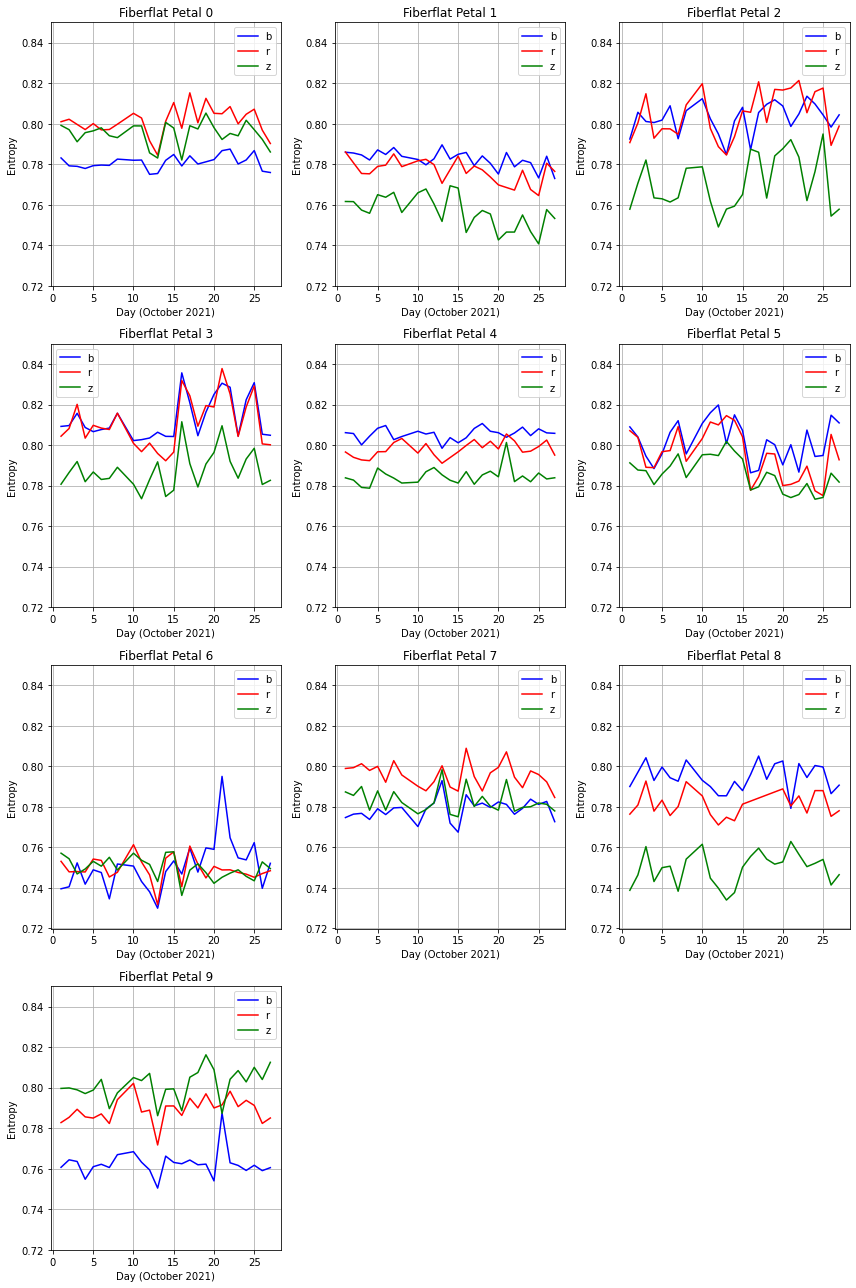

In [59]:
colors = {'b':'blue', 'r':'red', 'z':'green'}
data = pd.read_csv('calibnight_entropy.csv')
dates = list(set(data['NIGHT']))
print(len(dates), dates)
plt.figure(figsize=(12,18))
for ic, petal in enumerate(range(10)):
    plt.subplot(4,3,ic+1)
    plt.title("Fiberflat Petal {}".format(petal))
    for camera in ['b', 'r', 'z']:
        ii=(data['PETAL']==petal) & (data['CAMERA']==camera)
        plt.plot(data['NIGHT'][ii]-20211000, data['ENTROPY'][ii], label=camera, color=colors[camera])
    plt.legend()
    plt.ylim([0.72, 0.85])
    plt.xlabel("Day (October 2021)")
    plt.ylabel("Entropy")
    plt.grid()
    plt.tight_layout()


14 [20211001, 20211002, 20211003, 20211004, 20211005, 20211006, 20211007, 20211008, 20211009, 20211010, 20211011, 20211012, 20211013, 20211014] 38160


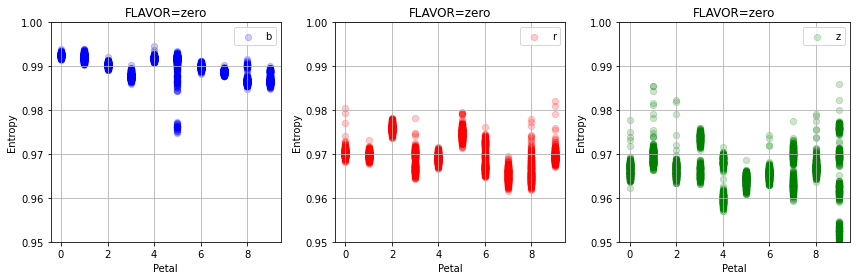

In [6]:
colors = {'b':'blue', 'r':'red', 'z':'green'}
data = pd.read_csv('entropy_exposures_202110.csv')
dates = list(set(data['NIGHT']))
dates.sort()
print(len(dates), dates, len(data))
plt.figure(figsize=(12,4))
flavor = 'zero'
for ic, camera in enumerate(['b', 'r', 'z']):
    
    plt.subplot(1,3,ic+1)
    for date in dates:
        ii=(data['CAMERA']==camera) & (data['NIGHT']==date) & (data['FLAVOR']==flavor)
        if date!=dates[0]:
            plt.scatter(data['PETAL'][ii], data['ENTROPY'][ii], color=colors[camera], alpha=0.2, s=40)
        else:
            plt.scatter(data['PETAL'][ii], data['ENTROPY'][ii], label=camera, color=colors[camera], alpha=0.2, s=40)
        plt.title('FLAVOR={}'.format(flavor))
    plt.legend()
    plt.ylim([0.9500, 1.0])
    plt.grid()
    plt.ylabel("Entropy")
    plt.xlabel("Petal")
plt.tight_layout()
plt.savefig("entropy_per_camera.jpg")

14 [20211008, 20211009, 20211010, 20211011, 20211012, 20211013, 20211014, 20211001, 20211002, 20211003, 20211004, 20211005, 20211006, 20211007]


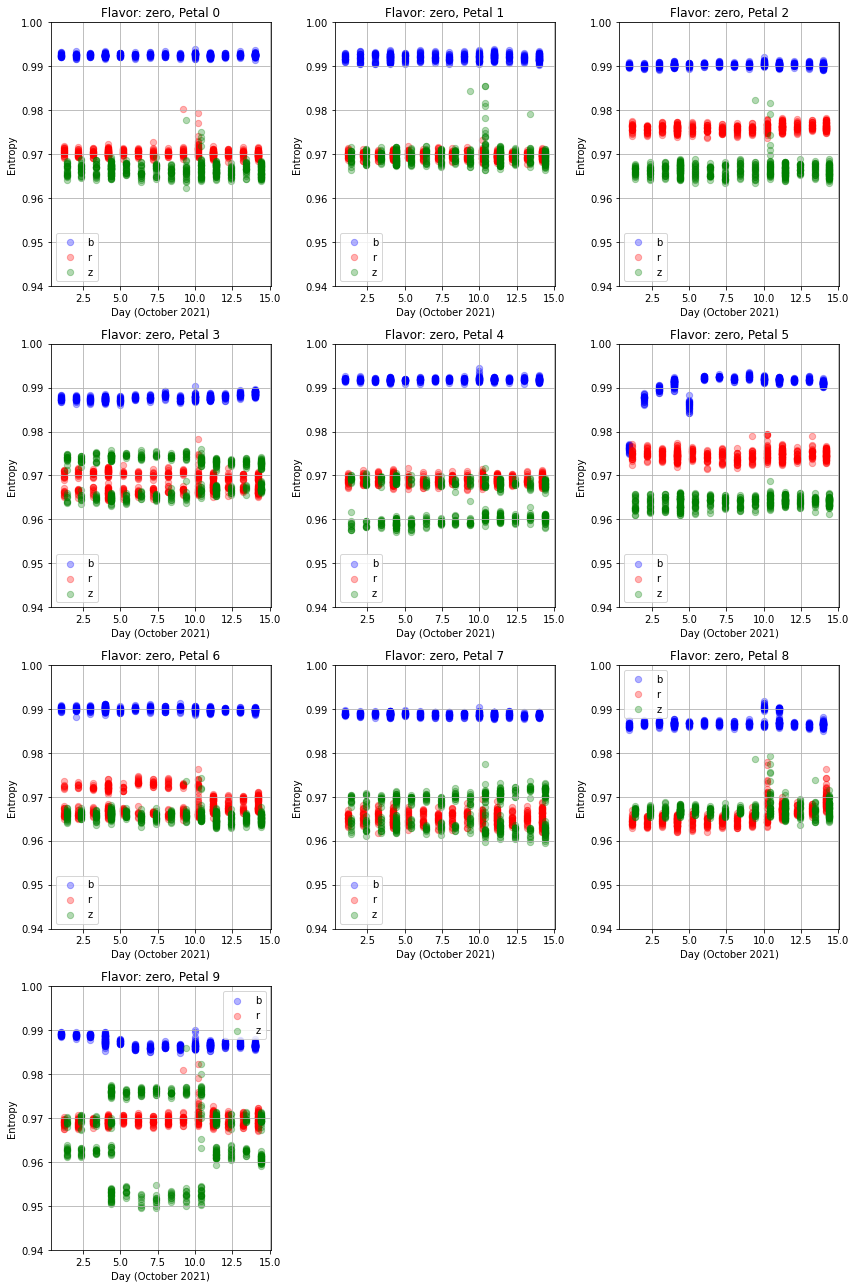

In [5]:
colors = {'b':'blue', 'r':'red', 'z':'green'}
data = pd.read_csv('entropy_exposures_202110.csv')
dates = list(set(data['NIGHT']))
print(len(dates), dates)
dates.sort()
flavor = 'zero'
plt.figure(figsize=(12,18))
for ic, petal in enumerate(range(10)):
    plt.subplot(4,3,ic+1)
    plt.title("Flavor: {}, Petal {}".format(flavor, petal))
    for dd, camera in enumerate(['b', 'r', 'z']):
        ii=(data['PETAL']==petal) & (data['CAMERA']==camera) & (data['FLAVOR']==flavor)
        plt.scatter(data['NIGHT'][ii]-20211000 + dd*0.2, data['ENTROPY'][ii], label=camera, color=colors[camera], s=40, alpha=0.3)
        #print(set(data['NIGHT'][ii]-20211000))
    plt.legend()
    if flavor=='science':
        plt.ylim([0.80, 1.0])
    else:
        plt.ylim([0.94, 1.0])
    plt.xlabel("Day (October 2021)")
    plt.ylabel("Entropy")
    plt.grid()
    plt.tight_layout()
    plt.savefig("entropy_per_date.jpg")

In [10]:
header = fitsio.read("/global/cfs/cdirs/desi/spectro/data/20211026/00106129/desi-00106129.fits.fz", header=True)

In [183]:
header[1]["FLAVOR"]

'zero'